In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
# pip install fbprophet
# pip install pystan
# pip install pandas_datareader

In [14]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from datetime import datetime

In [24]:
data_web = pd.read_csv("./data/Web Traffic.csv", 
                       encoding='utf-8',
                       thousands=',',
                      names=['date', 'hit'], index_col=0)
data_web = data_web[data_web['hit'].notnull()]


430.85973081109626
430.62841018946943
429.5328046676293
330.47773064392265


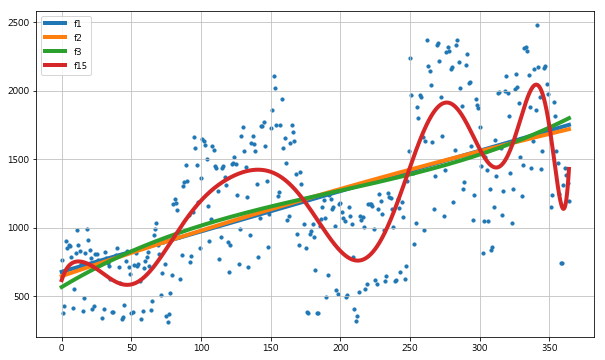

In [38]:
#data_web['hit'].plot(figsize=(12,4), grid=True)
#ata_web.head()
time = np.arange(0, len(data_web))
traffic = data_web['hit'].values
fx = np.linspace(0, time[-1], 1000)
#np.array([0,1,2,3,4])
#np.arange(1, 20,2)
#np.linspace(0,100, 5)

def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))


fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))


plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

